In [1]:
import pandas as pd

df1 = pd.read_excel("dognition_data_aggregated_by_dogid.xlsx")

print(df1.head())



                                 Dog ID  Total Tests Completed  \
0  fd27b272-7144-11e5-ba71-058fbc01cf0b                     21   
1  fd27b5ba-7144-11e5-ba71-058fbc01cf0b                     20   
2  fd27b6b4-7144-11e5-ba71-058fbc01cf0b                      2   
3  fd27b79a-7144-11e5-ba71-058fbc01cf0b                     11   
4  fd27b86c-7144-11e5-ba71-058fbc01cf0b                     31   

   Mean ITI (days)  Mean ITI (minutes)  Median ITI (days)  \
0        28.201076        40609.549167           0.004687   
1         0.413307          595.162281           0.005845   
2         0.009132           13.150000           0.009132   
3        56.115179        80805.858333           0.004433   
4         7.734254        11137.326111           0.000399   

   Median ITI (minutes)  Time diff between first and last game (days)  \
0              6.750000                                    564.021516   
1              8.416667                                      7.852836   
2             13.

In [2]:
df2 = pd.read_excel("dognition_data_no_aggregation_with_zip_code_correction.xlsx")

print(df2.head())


           Created_at          Updated_at  \
0 2013-05-13 16:17:00 2013-05-13 16:17:00   
1 2013-05-22 18:54:00 2013-05-22 18:54:00   
2 2013-05-22 18:55:00 2013-05-22 18:55:00   
3 2013-05-22 18:56:00 2013-05-22 18:56:00   
4 2013-05-22 18:58:00 2013-05-22 18:58:00   

                                User_ID                                Dog_ID  \
0  ce134a78-7144-11e5-ba71-058fbc01cf0b  fd3d1b44-7144-11e5-ba71-058fbc01cf0b   
1  ce134a78-7144-11e5-ba71-058fbc01cf0b  fd3d1b44-7144-11e5-ba71-058fbc01cf0b   
2  ce134a78-7144-11e5-ba71-058fbc01cf0b  fd3d1b44-7144-11e5-ba71-058fbc01cf0b   
3  ce134a78-7144-11e5-ba71-058fbc01cf0b  fd3d1b44-7144-11e5-ba71-058fbc01cf0b   
4  ce134a78-7144-11e5-ba71-058fbc01cf0b  fd3d1b44-7144-11e5-ba71-058fbc01cf0b   

             Test_name Subcategory_name Gender  Birthday     Breed  \
0         Yawn Warm-up          Empathy   male      2009  Shih Tzu   
1            Yawn Game          Empathy   male      2009  Shih Tzu   
2  Eye Contact Warm-up          

In [3]:
df3 = pd.concat([df1, df2], ignore_index=True)
print("\nColumn Names for df3:")
print(df3.columns)


Column Names for df3:
Index(['Dog ID', 'Total Tests Completed', 'Mean ITI (days)',
       'Mean ITI (minutes)', 'Median ITI (days)', 'Median ITI (minutes)',
       'Time diff between first and last game (days)',
       'Time diff between first and last game (minutes)', 'User ID', 'Gender',
       'Birthday', 'Breed', 'Breed_Type', 'Breed_Group', 'Weight', 'Dog_Fixed',
       'DNA_Tested', 'Dimension', 'Sign_in_Count', 'Max_Dogs', 'Membership_ID',
       'Subscribed', 'City', 'State', 'Zip', 'Country', 'Exclude',
       'Free_Start_User', 'Last_Active_At', 'Membership_Type', 'Created_at',
       'Updated_at', 'User_ID', 'Dog_ID', 'Test_name', 'Subcategory_name',
       'Rating', 'Rank_by_UserID', 'Rank_by_DogID'],
      dtype='object')


In [4]:
Features = df3[["Dog ID","Total Tests Completed","Mean ITI (days)", "Mean ITI (minutes)", "Median ITI (days)", "Gender", "Birthday", "Breed", "Dimension"]]
Features.head()

,Dog ID,Total Tests Completed,Mean ITI (days),Mean ITI (minutes),Median ITI (days),Gender,Birthday,Breed,Dimension
0,fd27b272-7144-11e5-ba71-058fbc01cf0b,21.0,28.201076,40609.549167,0.004687,female,2011.0,Labrador Retriever,charmer
1,fd27b5ba-7144-11e5-ba71-058fbc01cf0b,20.0,0.413307,595.162281,0.005845,male,2007.0,Shetland Sheepdog,protodog
2,fd27b6b4-7144-11e5-ba71-058fbc01cf0b,2.0,0.009132,13.150000,0.009132,male,2012.0,Golden Retriever,0
3,fd27b79a-7144-11e5-ba71-058fbc01cf0b,11.0,56.115179,80805.858333,0.004433,male,2011.0,Golden Retriever,0
4,fd27b86c-7144-11e5-ba71-058fbc01cf0b,31.0,7.734254,11137.326111,0.000399,female,2010.0,Shih Tzu,einstein


In [5]:
Features["Dimension"].replace(0, "ace", inplace = True)
Features["Dimension"] = Features["Dimension"].fillna(Features["Dimension"].mode)
Dimension_totalTests = Features.groupby(['Dimension'])['Total Tests Completed'].sum()
Dimension_totalTests

C:\Users\knyvz\AppData\Local\Temp\ipykernel_215520\1052761218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Features["Dimension"].replace(0, "ace", inplace = True)
C:\Users\knyvz\AppData\Local\Temp\ipykernel_215520\1052761218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Features["Dimension"] = Features["Dimension"].fillna(Features["Dimension"].mode)


Dimension
<bound method Series.mode of 0          charmer\n1         protodog\n2              ace\n3              ace\n4         einstein\n            ...   \n195462         NaN\n195463         NaN\n195464         NaN\n195465         NaN\n195466         NaN\nName: Dimension, Length: 195467, dtype: object>       20.0
ace                                                                                                                                                                                                                                                                                                         96169.0
charmer                                                                                                                                                                                                                                                                                                     14884.0
einstein                                                          

In [6]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195467 entries, 0 to 195466
Data columns (total 39 columns):
 #   Column                                           Non-Null Count   Dtype         
---  ------                                           --------------   -----         
 0   Dog ID                                           17986 non-null   object        
 1   Total Tests Completed                            17986 non-null   float64       
 2   Mean ITI (days)                                  16718 non-null   float64       
 3   Mean ITI (minutes)                               16718 non-null   float64       
 4   Median ITI (days)                                16718 non-null   float64       
 5   Median ITI (minutes)                             16718 non-null   float64       
 6   Time diff between first and last game (days)     17986 non-null   float64       
 7   Time diff between first and last game (minutes)  17986 non-null   float64       
 8   User ID                 

In [7]:
Features["Dimension"]

0                                                   charmer
1                                                  protodog
2                                                       ace
3                                                       ace
4                                                  einstein
                                ...                        
195462    <bound method Series.mode of 0          charme...
195463    <bound method Series.mode of 0          charme...
195464    <bound method Series.mode of 0          charme...
195465    <bound method Series.mode of 0          charme...
195466    <bound method Series.mode of 0          charme...
Name: Dimension, Length: 195467, dtype: object

In [31]:
Dimension_Group = Features.groupby(['Dimension'])
DT_Corrolation = Dimension_Group['Total Tests Completed'].sum()
DT_Corrolation = DT_Corrolation[1:]
DT_Corrolation

Dimension
ace                96169.0
charmer            14884.0
einstein            2791.0
expert              6425.0
maverick            5769.0
protodog           13078.0
renaissance-dog    10922.0
socialite          18671.0
stargazer           7664.0
Name: Total Tests Completed, dtype: float64

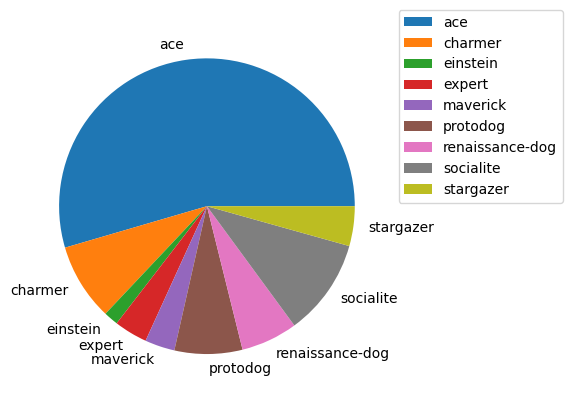

In [32]:
import matplotlib.pyplot as plt

ax = DT_Corrolation.plot(kind="pie", ylabel = '')
ax.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
plt.show()

In [10]:
#How does Speed of Game Completion related to number of tests completed?

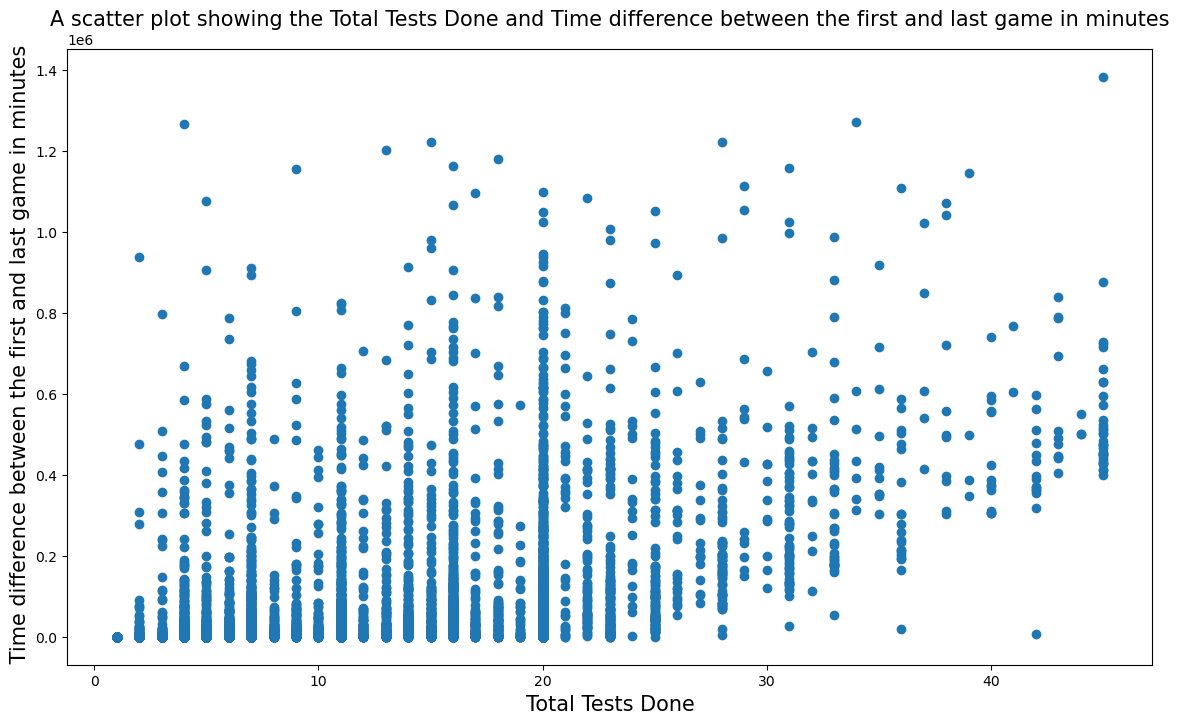

In [11]:
plt.figure(figsize = (14,8))
plt.scatter(x= Features['Total Tests Completed'] , y= df3['Time diff between first and last game (minutes)'])
#***can change
plt.xlabel("Total Tests Done",fontsize=15) 
#***can change
plt.ylabel(" Time difference between the first and last game in minutes",fontsize=15)
#***can change
plt.title('A scatter plot showing the Total Tests Done and Time difference between the first and last game in minutes',fontsize=15)
plt.show()

In [12]:
#The scatter plot above shows the Time difference between the first and last game in minutes as it increases the total number of tests decreasing after 20.

In [13]:
#Does different breed (group or type) complete tests differently?

In [61]:
df_BreedGroup = df3['Breed_Group']
df_BreedGroup.replace(0, 'Sporting', inplace = True)
types = df_BreedGroup.unique()
types

array(['Sporting', 'Herding', 'Toy', 'Working', 'Hound', 'Non-Sporting',
       'Terrier', nan], dtype=object)

In [62]:
import random
def replace_na(x):
    """Replace NaN values with values randomly selected from the Series."""
    r = types[random.randint(0, 6)]
    if pd.isnull(x):
        return r
    return x

In [63]:
import random
# A list of all possible breed group / type
# Fill the nul values with one of the randomn breed group / type
df_BreedGroup = df_BreedGroup.apply(lambda x: replace_na(x))
df_BreedGroup

0             Sporting
1              Herding
2             Sporting
3             Sporting
4                  Toy
              ...     
195462    Non-Sporting
195463    Non-Sporting
195464    Non-Sporting
195465        Sporting
195466         Working
Name: Breed_Group, Length: 195467, dtype: object

In [64]:
df_BreedGroup.value_counts()

Breed_Group
Sporting        51374
Herding         34939
Toy             24212
Non-Sporting    23069
Working         22319
Terrier         20866
Hound           18688
Name: count, dtype: int64

In [65]:
df_BreedGroupTest = pd.DataFrame(columns = ['Breed_Group', 'Total Tests Completed'])

df_BreedGroupTest['Breed_Group'] = df_BreedGroup

df_BreedGroupTest['Total Tests Completed'] = df3['Total Tests Completed']
df_BreedGroupTest

,Breed_Group,Total Tests Completed
0,Sporting,21.0
1,Herding,20.0
2,Sporting,2.0
3,Sporting,11.0
4,Toy,31.0
...,...,...
195462,Non-Sporting,NaN
195463,Non-Sporting,NaN
195464,Non-Sporting,NaN
195465,Sporting,NaN


In [66]:
df_BreedGroupTest = df_BreedGroupTest.groupby(['Breed_Group'])['Total Tests Completed'].sum()
df_BreedGroupTest

Breed_Group
Herding          20161.0
Hound             5419.0
Non-Sporting      9596.0
Sporting        114838.0
Terrier           7557.0
Toy              10117.0
Working           8705.0
Name: Total Tests Completed, dtype: float64

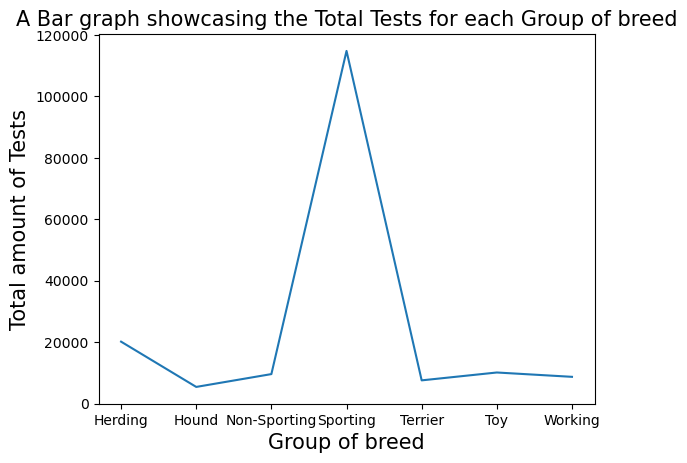

In [67]:
plt.plot(df_BreedGroupTest)
plt.xlabel("Group of breed",fontsize=15)  
plt.ylabel("Total amount of Tests",fontsize=15)
plt.title("A Bar graph showcasing the Total Tests for each Group of breed",fontsize=15)
plt.show()

In [ ]:
#The graph shows that the Sporting breed group has the most completed test .

In [ ]:
# Does dog with previous behavioral training get more tests completed?

In [ ]:

df_training = pd.DataFrame(columns = ['Trained', 'Total Tests Completed'])

df_training['Trained'] = df3['Sign_in_Count']
df_training['Trained'] = df_training['Trained'].apply(lambda x: "No" if x == 1 else "Yes")


df_training['Total Tests Completed'] = df3['Total Tests Completed']
df_training


In [ ]:
# group the total test completed by prev_training_done
df_training = df_training.groupby(df_training['Trained'])['Total Tests Completed'].sum()
df_training

In [ ]:

ax = df_training.plot(kind="pie", ylabel = '')
ax.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
plt.xlabel("previous training done",fontsize=15)  
plt.ylabel("Total amount of tests",fontsize=15)
plt.title('A Bar graph showcasing the Total amount of Tests for previous training done',fontsize=15)
plt.show()

In [ ]:
# The bar shows that dogs who were trained before have completed more tests.

In [ ]:
_